In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras as k
import sklearn as sk
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using CNTK backend
C:\Program Files\Anaconda3\lib\site-packages\keras\backend\cntk_backend.py:25: UserWarning: CNTK backend warning: GPU is not detected. CNTK's CPU version is not fully optimized,please run with GPU to get better performance.
  'CNTK backend warning: GPU is not detected. '


In [2]:
bd_train = np.reshape(np.loadtxt('../../bindigit_trn.csv', delimiter=',', dtype = 'float32'), [8000, 784])
bd_test = np.reshape(np.loadtxt('../../bindigit_tst.csv', delimiter=',', dtype = 'float32'), [2000, 784])
td_train = np.reshape(np.loadtxt('../../targetdigit_trn.csv', delimiter=',', dtype = 'float32'), [8000])
td_test = np.reshape(np.loadtxt('../../targetdigit_tst.csv', delimiter=',', dtype = 'float32'), [2000])

Building model_1_hidden_layers

In [13]:
n_hidden_list = [300]
reg = 0.00001
batch_size = 256
epochs = 50

# Pretraining layer 1
model = k.models.Sequential()
model.add(k.layers.Dense(n_hidden_list[0], input_dim = 784, kernel_initializer='RandomNormal', activation='relu', use_bias = True,
                             bias_initializer = 'Zeros', kernel_regularizer=k.regularizers.l2(reg)))
model.add(k.layers.Dense(784, kernel_initializer='RandomNormal', activation='sigmoid', use_bias = True,
                             bias_initializer = 'Zeros', kernel_regularizer=k.regularizers.l2(reg)))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(bd_train, bd_train, epochs = epochs, batch_size = batch_size, verbose = 0)
weights1 = model.get_weights()[0:2]

model.pop()
values_model = model.predict(bd_train)

# Classification layer

model4 = k.models.Sequential()
model4.add(k.layers.Dense(units=1, input_dim = n_hidden_list[0], kernel_initializer='RandomNormal', activation='relu', use_bias = True,
                             bias_initializer = 'Zeros', kernel_regularizer=k.regularizers.l2(reg)))
model4.compile(optimizer='adam', loss='mean_squared_error')
model4.fit(values_model, td_train, epochs = epochs, batch_size = batch_size, verbose = 0)

values_model4 = model4.predict(values_model)

input1 = k.Input(shape=[784])
output1 = model(input1)
output4 = model4(output1)
model_1_hidden_layer = k.models.Model(input1,output4)
model_1_hidden_layer.compile(optimizer='adam', loss='mean_squared_error')

Building model_2_hidden_layers

In [8]:
n_hidden_list = [300,100]
reg = 0.00001
batch_size = 256
epochs = 50

# Pretraining layer 1
model = k.models.Sequential()
model.add(k.layers.Dense(n_hidden_list[0], input_dim = 784, kernel_initializer='RandomNormal', activation='relu', use_bias = True,
                             bias_initializer = 'Zeros', kernel_regularizer=k.regularizers.l2(reg)))
model.add(k.layers.Dense(784, kernel_initializer='RandomNormal', activation='sigmoid', use_bias = True,
                             bias_initializer = 'Zeros', kernel_regularizer=k.regularizers.l2(reg)))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(bd_train, bd_train, epochs = epochs, batch_size = batch_size, verbose = 0)
weights1 = model.get_weights()[0:2]

model.pop()
values_model = model.predict(bd_train)

# Pretraining layer 2

model2 = k.models.Sequential()
model2.add(k.layers.Dense(n_hidden_list[1], input_dim = n_hidden_list[0], kernel_initializer='RandomNormal', activation='relu', use_bias = True,
                             bias_initializer = 'Zeros', kernel_regularizer=k.regularizers.l2(reg)))
model2.add(k.layers.Dense(784, kernel_initializer='RandomNormal', activation='sigmoid', use_bias = True,
                             bias_initializer = 'Zeros', kernel_regularizer=k.regularizers.l2(reg)))
model2.compile(optimizer='adam', loss='mean_squared_error')
model2.fit(values_model, bd_train, epochs = epochs, batch_size = batch_size, verbose = 0)

model2.pop()
values_model2 = model2.predict(values_model)

# Classification layer

model4 = k.models.Sequential()
model4.add(k.layers.Dense(units=1, input_dim = n_hidden_list[1], kernel_initializer='RandomNormal', activation='relu', use_bias = True,
                             bias_initializer = 'Zeros', kernel_regularizer=k.regularizers.l2(reg)))
model4.compile(optimizer='adam', loss='mean_squared_error')
model4.fit(values_model2, td_train, epochs = epochs, batch_size = batch_size, verbose = 0)

values_model4 = model4.predict(values_model2)

input1 = k.Input(shape=[784])
output1 = model(input1)
output2 = model2(output1)
output4 = model4(output2)
model_2_hidden_layer = k.models.Model(input1,output4)
model_2_hidden_layer.compile(optimizer='adam', loss='mean_squared_error')

Building model_3_hidden_layers

In [6]:
n_hidden_list = [300,100,70]
reg = 0.00001
batch_size = 256
epochs = 50

# Pretraining layer 1
model = k.models.Sequential()
model.add(k.layers.Dense(n_hidden_list[0], input_dim = 784, kernel_initializer='RandomNormal', activation='relu', use_bias = True,
                             bias_initializer = 'Zeros', kernel_regularizer=k.regularizers.l2(reg)))
model.add(k.layers.Dense(784, kernel_initializer='RandomNormal', activation='sigmoid', use_bias = True,
                             bias_initializer = 'Zeros', kernel_regularizer=k.regularizers.l2(reg)))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(bd_train, bd_train, epochs = epochs, batch_size = batch_size, verbose = 0)
weights1 = model.get_weights()[0:2]

model.pop()
values_model = model.predict(bd_train)

# Pretraining layer 2

model2 = k.models.Sequential()
model2.add(k.layers.Dense(n_hidden_list[1], input_dim = n_hidden_list[0], kernel_initializer='RandomNormal', activation='relu', use_bias = True,
                             bias_initializer = 'Zeros', kernel_regularizer=k.regularizers.l2(reg)))
model2.add(k.layers.Dense(784, kernel_initializer='RandomNormal', activation='sigmoid', use_bias = True,
                             bias_initializer = 'Zeros', kernel_regularizer=k.regularizers.l2(reg)))
model2.compile(optimizer='adam', loss='mean_squared_error')
model2.fit(values_model, bd_train, epochs = epochs, batch_size = batch_size, verbose = 0)

model2.pop()
values_model2 = model2.predict(values_model)

# Pretraining layer 3

model3 = k.models.Sequential()
model3.add(k.layers.Dense(n_hidden_list[2], input_dim = n_hidden_list[1], kernel_initializer='RandomNormal', activation='relu', use_bias = True,
                             bias_initializer = 'Zeros', kernel_regularizer=k.regularizers.l2(reg)))
model3.add(k.layers.Dense(784, kernel_initializer='RandomNormal', activation='sigmoid', use_bias = True,
                             bias_initializer = 'Zeros', kernel_regularizer=k.regularizers.l2(reg)))
model3.compile(optimizer='adam', loss='mean_squared_error')
model3.fit(values_model2, bd_train, epochs = epochs, batch_size = batch_size, verbose = 0)

model3.pop()
values_model3 = model3.predict(values_model2)

# Classification layer

model4 = k.models.Sequential()
model4.add(k.layers.Dense(units=1, input_dim = n_hidden_list[2], kernel_initializer='RandomNormal', activation='relu', use_bias = True,
                             bias_initializer = 'Zeros', kernel_regularizer=k.regularizers.l2(reg)))
model4.compile(optimizer='adam', loss='mean_squared_error')
model4.fit(values_model3, td_train, epochs = epochs, batch_size = batch_size, verbose = 0)

values_model4 = model4.predict(values_model3)

input1 = k.Input(shape=[784])
output1 = model(input1)
output2 = model2(output1)
output3 = model3(output2)
output4 = model4(output3)
model_3_hidden_layer = k.models.Model(input1,output4)
model_3_hidden_layer.compile(optimizer='adam', loss='mean_squared_error')

No hidden layer: classification layer on raw input

In [10]:
reg = 0.00001
batch_size = 256
epochs = 50

# Classification layer

model4 = k.models.Sequential()
model4.add(k.layers.Dense(units=1, input_dim = 784, kernel_initializer='RandomNormal', activation='relu', use_bias = True,
                             bias_initializer = 'Zeros', kernel_regularizer=k.regularizers.l2(reg)))
model4.compile(optimizer='adam', loss='mean_squared_error')
model4.fit(bd_train, td_train, epochs = epochs, batch_size = batch_size, verbose = 0)

model_0_hidden_layer = model4

In [17]:
models = [model_0_hidden_layer, model_1_hidden_layer, model_2_hidden_layer, model_3_hidden_layer]
scores = []
for i in range(4):
    print(i)
    model = models[i]
    scores.append(model.evaluate(x=bd_test, y=td_test))

0
2000/2000 [==============================] - 0s 76us/step
1
2000/2000 [==============================] - 0s 116us/step
2
2000/2000 [==============================] - 0s 134us/step
3
2000/2000 [==============================] - 0s 149us/step


Text(0,0.5,'Error')

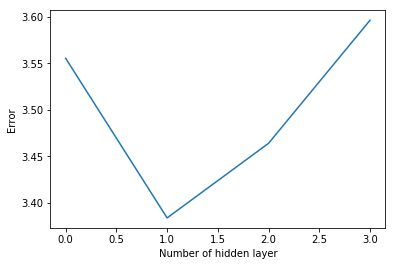

In [23]:
fig, ax = plt.subplots()
ax.plot(scores)
ax.set_xlabel('Number of hidden layer')
ax.set_ylabel('Error')

3 hidden layers train from scratch against 3 hidden layer pre trained

In [26]:
n_hidden_list = [300,100,70]
reg = 0.00001
batch_size = 256
epochs = 50

# Pretraining layer 2

model_scratch = k.models.Sequential()
model_scratch.add(k.layers.Dense(n_hidden_list[0], input_dim = 784, kernel_initializer='RandomNormal', activation='relu', use_bias = True,
                             bias_initializer = 'Zeros', kernel_regularizer=k.regularizers.l2(reg)))
model_scratch.add(k.layers.Dense(n_hidden_list[1], input_dim = n_hidden_list[0], kernel_initializer='RandomNormal', activation='relu', use_bias = True,
                             bias_initializer = 'Zeros', kernel_regularizer=k.regularizers.l2(reg)))
model_scratch.add(k.layers.Dense(n_hidden_list[2], input_dim = n_hidden_list[1], kernel_initializer='RandomNormal', activation='relu', use_bias = True,
                             bias_initializer = 'Zeros', kernel_regularizer=k.regularizers.l2(reg)))
model_scratch.add(k.layers.Dense(units=1, input_dim = n_hidden_list[2], kernel_initializer='RandomNormal', activation='relu', use_bias = True,
                             bias_initializer = 'Zeros', kernel_regularizer=k.regularizers.l2(reg)))
model_scratch.compile(optimizer='adam', loss='mean_squared_error')
model_scratch.fit(bd_train, td_train, epochs = epochs, batch_size = batch_size, verbose = 0)

In [27]:
score_scratch = model_scratchcratch.evaluate(bd_test, td_test)
print(score_scratch)

2000/2000 [==============================] - 0s 193us/step
1.1590989785194397
